<a href="https://colab.research.google.com/github/MateoMu/TDS_III/blob/master/Mini_Proyecto2_MateoMu%C3%B1ozArroyave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

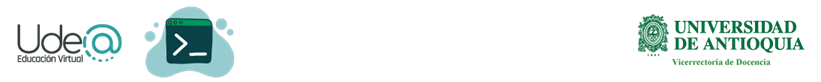


**Tratamiento de Señales III** *Mini-Proyecto 2*

**Modelos de variable Latente para el reconocimiento de emociones**


*   Mateo Muñoz Arroyave
    CC 1036676919


**Autor:**
*   Hernán Felipe García Arias, PhD.



**Facultad de Ingeniería**

**Universidad de Antioquia**

---

##Importación de librerias

In [3]:
%matplotlib inline
import scipy.io as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from scipy.signal import butter, lfilter, filtfilt, sosfilt, find_peaks
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import KernelPCA
from ipywidgets import interact

##Se cargan los datos del Dataframe del miniProyecto 1

In [4]:
# Cargar el conjunto de datos desde un archivo pickle
datos = pd.read_pickle("./dataMP1.pkl")

# última columna del conjunto de datos (Emociones)
columna_emociones = datos.iloc[:, -1]
columna_emociones = columna_emociones.values.reshape(-1, 1)  # Etiquetas

# Seleccionar las características del conjunto de datos (todas las columnas excepto la última)
caracteristicas = datos.values[:, 0:-1]

# Normalizar
scaler = StandardScaler()
caracteristicas_normalizadas = scaler.fit_transform(caracteristicas)

# Definir las matrices X e Y para el modelo
X = caracteristicas_normalizadas
Y = columna_emociones

# Obtener las etiquetas únicas y contar su frecuencia
etiquetas_unicas, frecuencias = np.unique(Y, return_counts=True)

# Aplicar PCA para reducción de dimensionalidad a 5 componentes principales
pca = PCA(n_components=5)
componentes_principales = pca.fit_transform(X)
X_reducido = componentes_principales[:, :5]

# Crear un DataFrame con las componentes principales y las etiquetas
df_reducido = pd.DataFrame(X_reducido, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
df_reducido['Emocion'] = Y

# Gráficas
# sns.pairplot(df_reducido, hue='Emocion', palette='tab10')

###Modelo PCA

In [5]:
# Creamos el modelo PCA
def PcaComponents(X, n):
  pca_Components = PCA(n_components=n)
  XPCAcomponents = pca_Components.fit_transform(X)
  # print("original shape:   ", pca_2Components.shape)
  print("transformed shape:", XPCAcomponents.shape)
  return XPCAcomponents

####Se aplica PCA con q=2

transformed shape: (160, 2)


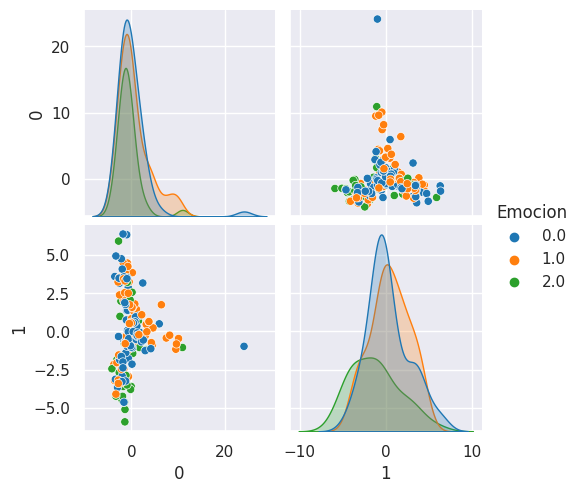

In [6]:
dataFramePCA= pd.DataFrame( PcaComponents(X,n=2))
dataFramePCA['Emocion'] = Y
sns.pairplot(dataFramePCA, hue='Emocion', palette= 'tab10')

####Aplicamos PCA con q=5

transformed shape: (160, 5)


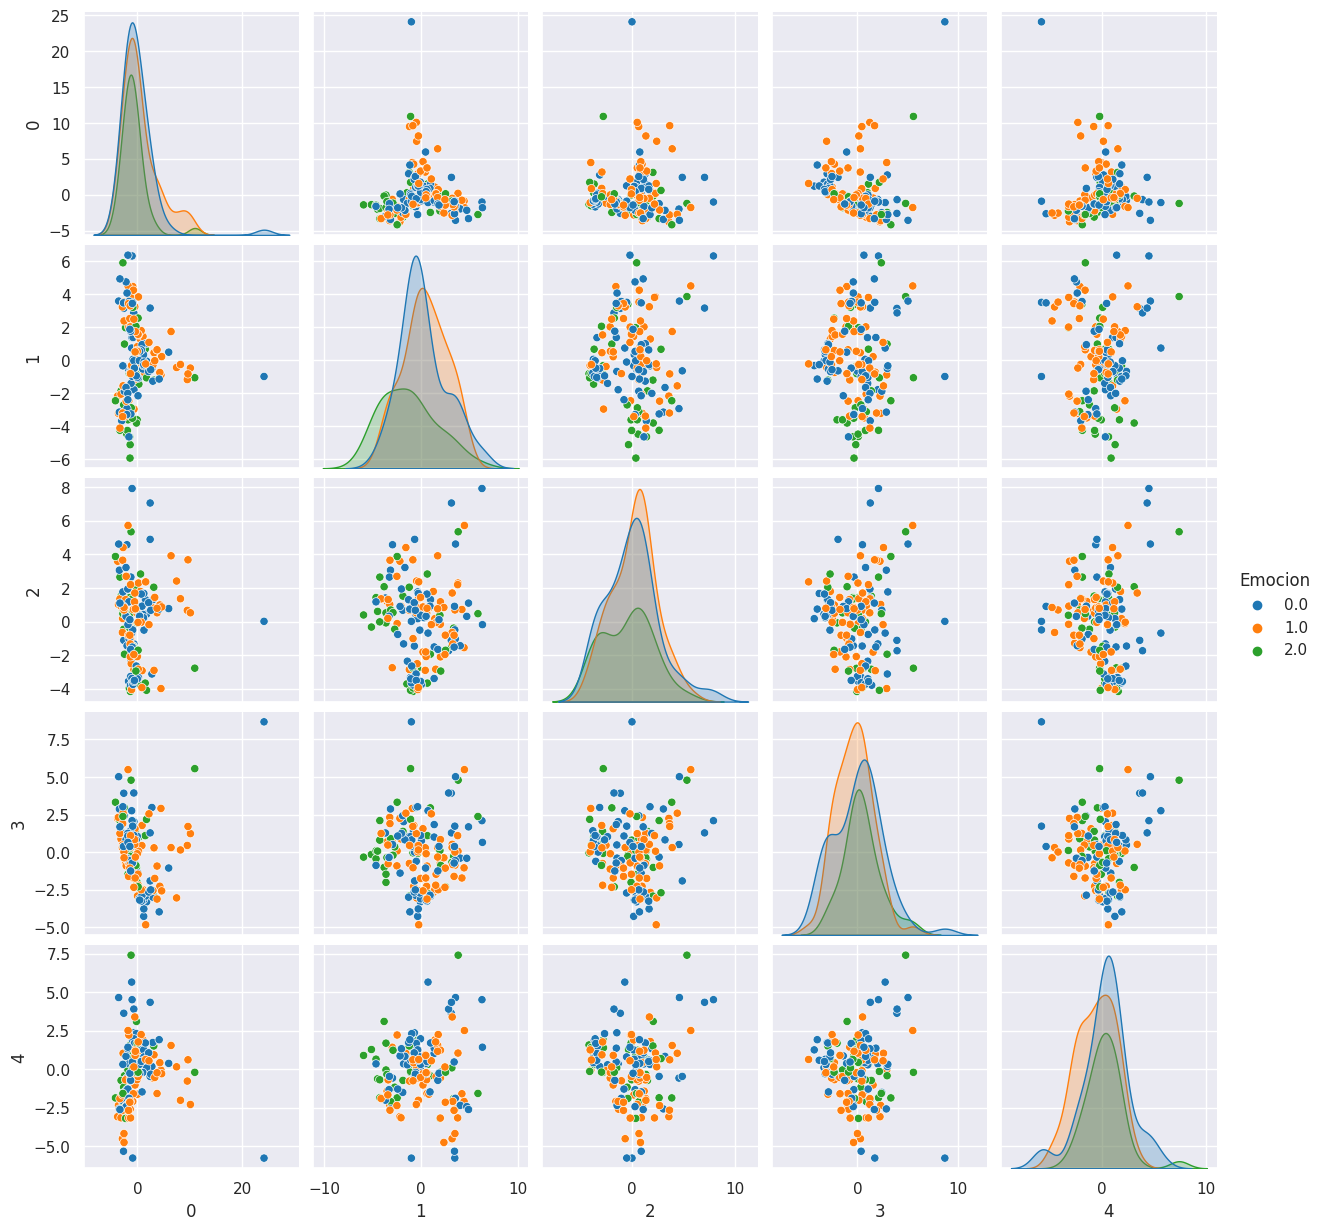

In [7]:
dataFramePCA= pd.DataFrame( PcaComponents(X,n=5))
dataFramePCA['Emocion'] = Y
sns.pairplot(dataFramePCA, hue='Emocion', palette= 'tab10')

####Aplicamos PCA con q=10

transformed shape: (160, 10)


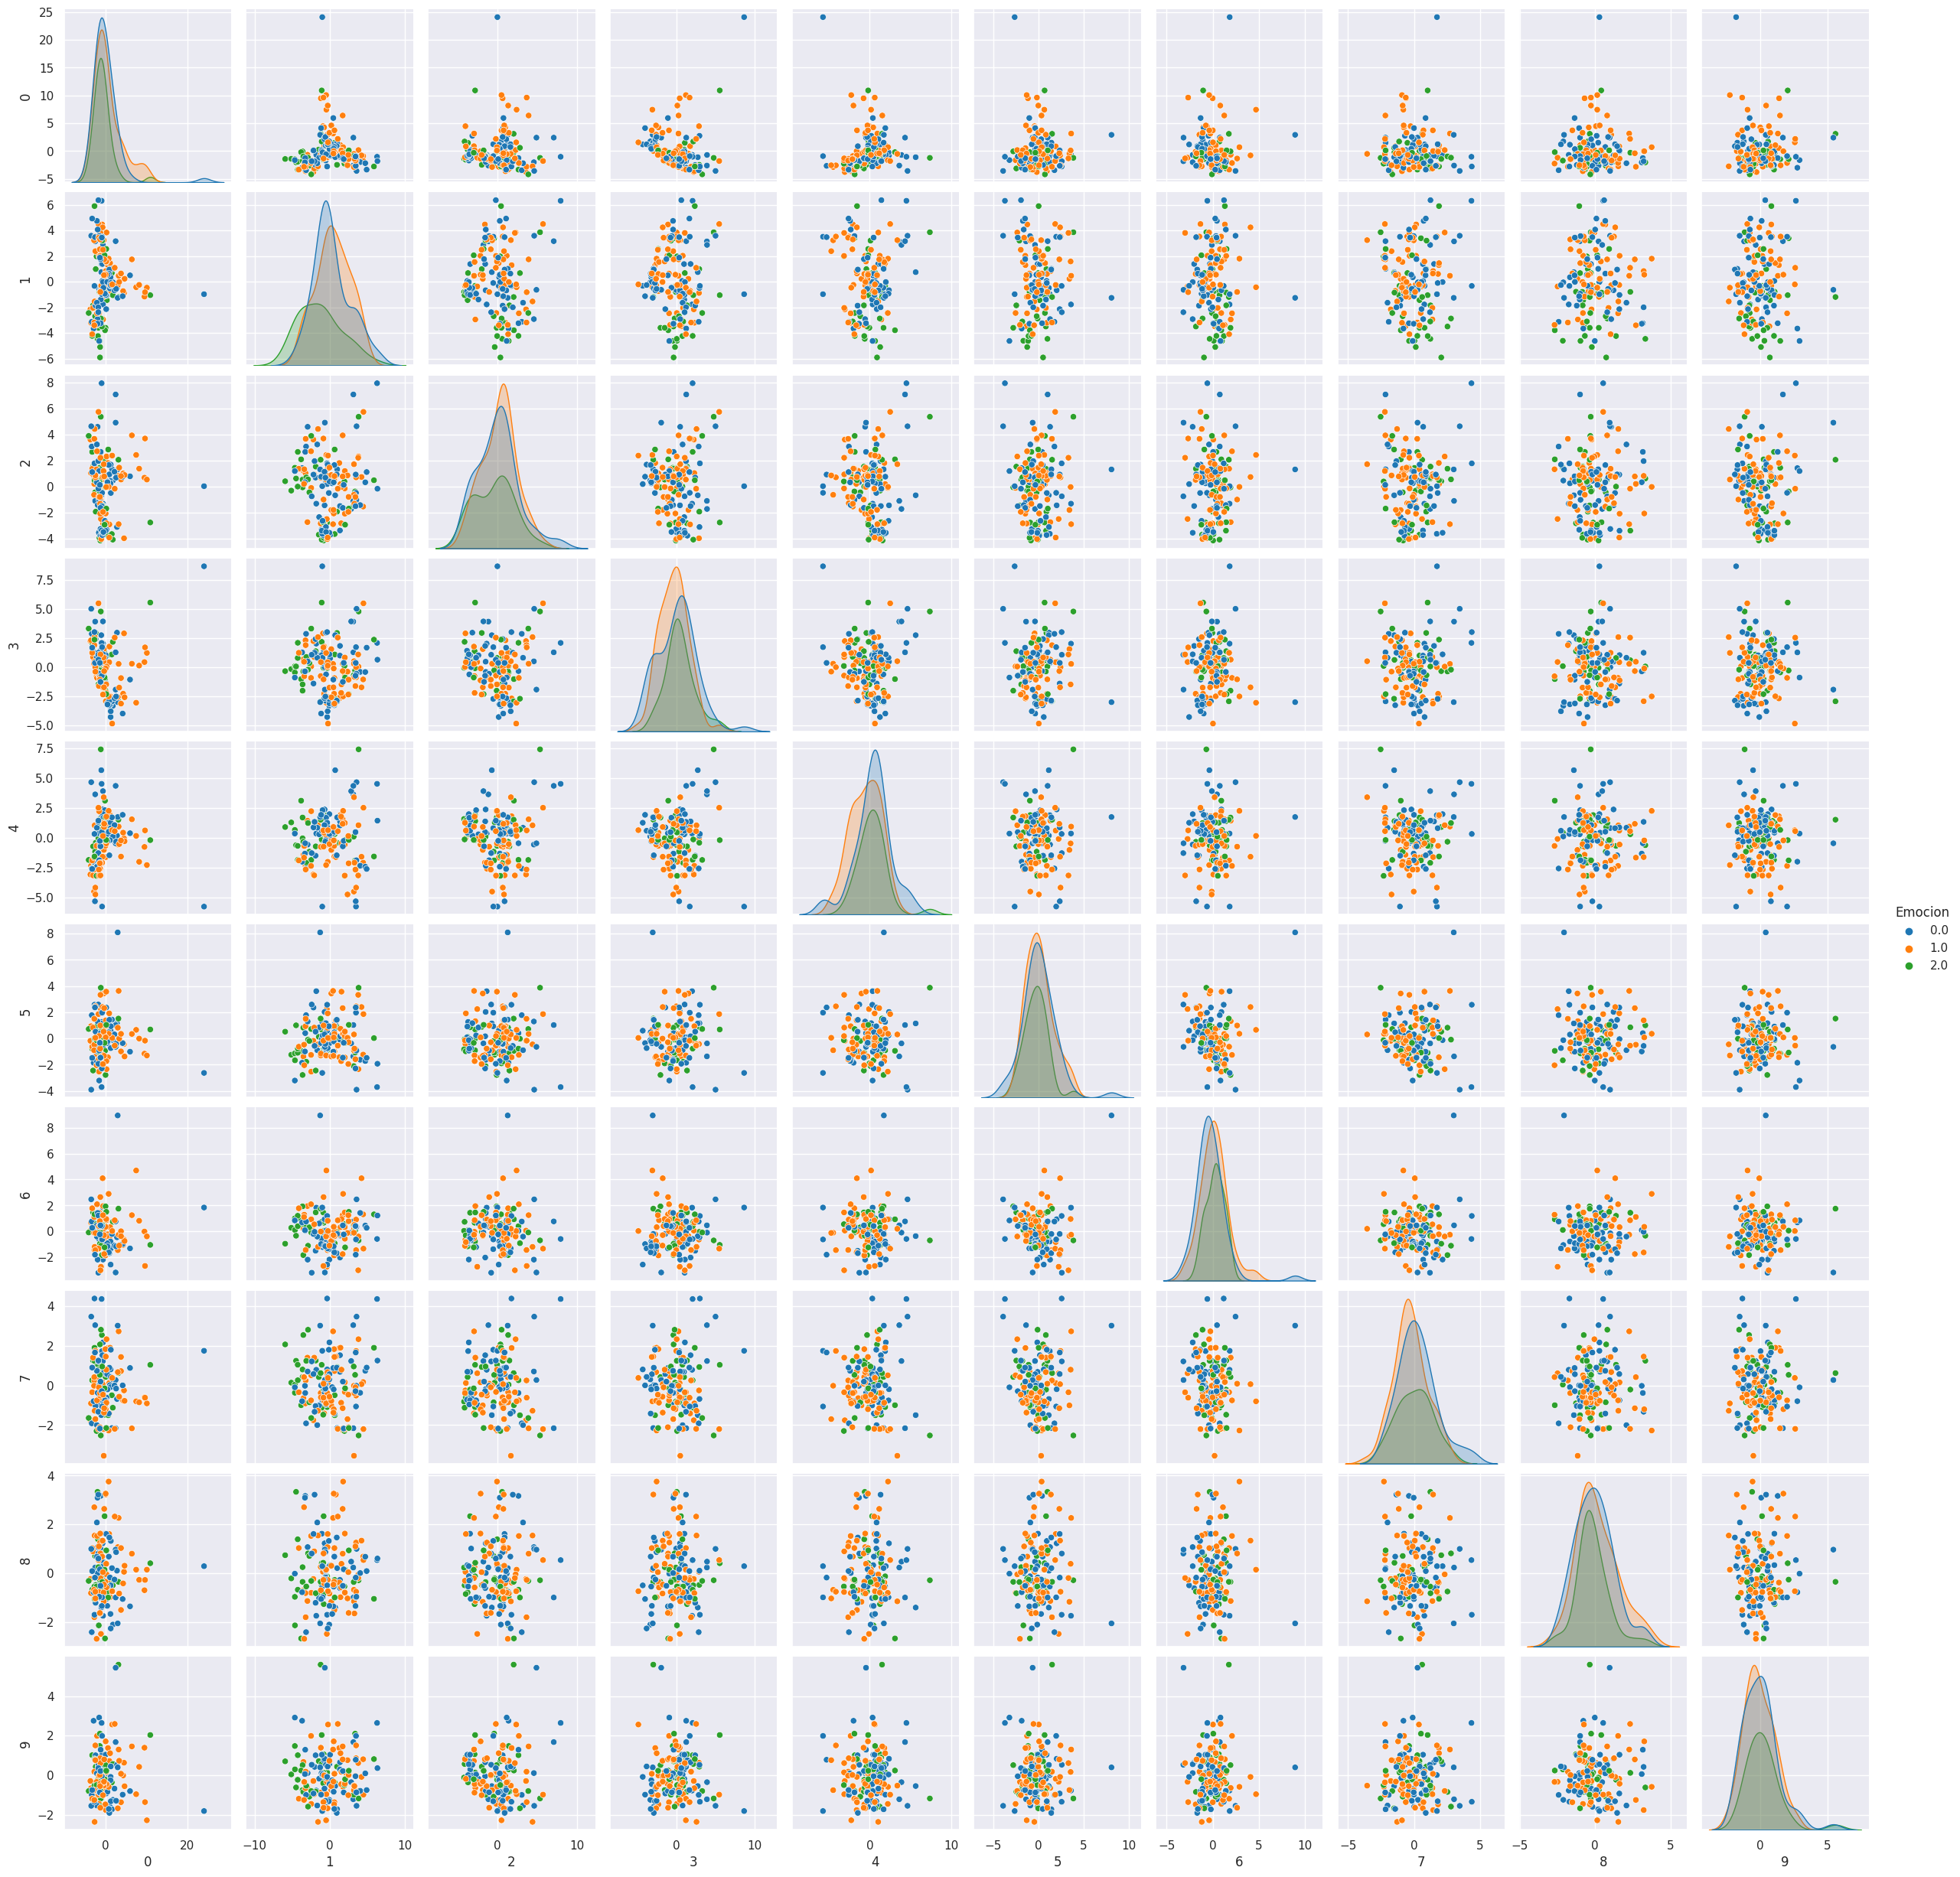

In [8]:
dataFramePCA= pd.DataFrame( PcaComponents(X,n=10))
dataFramePCA['Emocion'] = Y
sns.pairplot(dataFramePCA, hue='Emocion', palette= 'tab10')

In [9]:
def graficas_confusion(cMat_test_LR, cMat_test_NB, cMat_test_cu):
    emociones_unicas = df_reducido['Emocion'].unique()
    # Generar subgráficos para las matrices de confusión
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Mostrar la Matriz de Confusión para Regresión Logística
    ax1 = axes[0]
    display_LR = ConfusionMatrixDisplay(cMat_test_LR, display_labels=emociones_unicas)
    display_LR.plot(ax=ax1)
    ax1.set_title("Matriz de Confusión para Regresión Logística")
    ax1.grid(False)

    # Mostrar la Matriz de Confusión para el Modelo Bayesiano
    ax2 = axes[1]
    display_NB = ConfusionMatrixDisplay(cMat_test_NB, display_labels=emociones_unicas)
    display_NB.plot(ax=ax2)
    ax2.set_title("Matriz de Confusión para Modelo Bayesiano")
    ax2.grid(False)

    # Mostrar la Matriz de Confusión para Mínimos Cuadrados
    ax3 = axes[2]
    display_cu = ConfusionMatrixDisplay(cMat_test_cu, display_labels=emociones_unicas)
    display_cu.plot(ax=ax3)
    ax3.set_title("Matriz de Confusión para Mínimos Cuadrados")
    ax3.grid(False)

    # Visualizar los subgráficos
    plt.show()


def evaluar_modelos(X, Y):

    # Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
    y_train = y_train.ravel()
    y_test = y_test.ravel()


    #modelo de Regresión Logística

    # Ajustar el modelo de regresión logística
    clf = LogisticRegression().fit(X_train, y_train)
    # Realizar predicciones en los conjuntos de entrenamiento y prueba
    y_pred_LR_train = clf.predict(X_train)
    y_pred_LR_test = clf.predict(X_test)
    # Calcular la precisión en el conjunto de prueba
    precision_LR = accuracy_score(y_test, y_pred_LR_test)
    print('Precisión para regresión logística: ', precision_LR)
    # Calcular la matriz de confusión en el conjunto de prueba
    matriz_confusion_LR = confusion_matrix(y_test, y_pred_LR_test)


    #modelo Bayesiano

    # Ajustar el modelo bayesiano
    gnb = GaussianNB()
    # Realizar predicciones en los conjuntos de entrenamiento y prueba
    y_pred_NB = gnb.fit(X_train, y_train).predict(X_test)
    y_pred_train_NB = gnb.fit(X_train, y_train).predict(X_train)
    # Calcular la precisión en el conjunto de prueba
    precision_NB = accuracy_score(y_test, y_pred_NB)
    print('Precisión para modelo bayesiano: ', precision_NB)
    # Calcular la matriz de confusión en el conjunto de prueba
    matriz_confusion_NB = confusion_matrix(y_test, y_pred_NB)


    #modelo de Mínimos Cuadrados

    # Crear un conjunto de etiquetas T
    T1 = np.tile([1.,0.,0.],(62,1))
    T2 = np.tile([0.,1.,0.],(62,1))
    T3 = np.tile([0.,0.,1.],(36,1))
    T = np.concatenate((T1,T2,T3),axis = 0)
    # Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, T, test_size=0.3, random_state=0)
    Y_train=np.argmax(y_train, axis=1)
    Y_test=np.argmax(y_test, axis=1)


    # Concatenar un vector de unos en la primera columna para el modelo compacto
    Xtilde_train = np.concatenate((np.ones((len(X_train), 1)), X_train), axis=1)
    Xtilde_test = np.concatenate((np.ones((len(X_test), 1)), X_test), axis=1)

    XtildeT_train = Xtilde_train.T

    # Calcular el modelo con wk_tilde para cada columna relacionada a una clase
    lambda_value = 0.001
    Wtilde = np.linalg.inv(XtildeT_train @ Xtilde_train + lambda_value * np.eye(Xtilde_train.shape[1])) @ (XtildeT_train @ y_train)

    # Predicciones de entrenamiento
    Y_est_train = Xtilde_train @ Wtilde

    # Predicciones de prueba
    Xtilde_test = np.concatenate((np.ones((len(X_test), 1)), X_test), axis=1)
    Y_est_test = Xtilde_test @ Wtilde

    # Obtener las etiquetas predichas
    y_pred_train = np.argmax(Y_est_train, axis=1)
    y_pred_test = np.argmax(Y_est_test, axis=1)

    # Calcular la precisión
    precision_mi = accuracy_score(Y_test, y_pred_test)
    print('Precisión para mínimos cuadrados: ', precision_mi)
    # Calcular la matriz de confusión en el conjunto de prueba
    matriz_confusion_mi = confusion_matrix(Y_test, y_pred_test)

    return matriz_confusion_LR, matriz_confusion_NB, matriz_confusion_mi, precision_LR, precision_NB, precision_mi


### Sin usar PCA (Análisis de Componentes Principales)

Precisión para regresión logística:  0.5208333333333334
Precisión para modelo bayesiano:  0.3541666666666667
Precisión para mínimos cuadrados:  0.8333333333333334


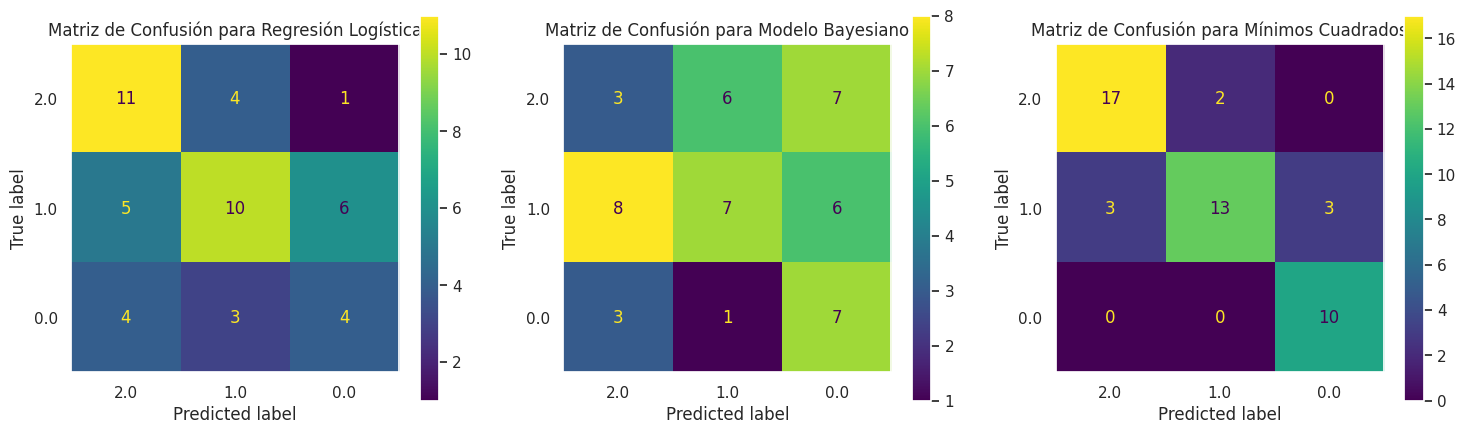

In [10]:
matriz_confusion_LR, matriz_confusion_NB, matriz_confusion_mi, precision_LR, precision_NB, precision_mi = evaluar_modelos(X,Y)
graficas_confusion(matriz_confusion_LR, matriz_confusion_NB, matriz_confusion_mi)

###Aplicando PCA


#####2 componentes

transformed shape: (160, 2)
Precisión para regresión logística:  0.4375
Precisión para modelo bayesiano:  0.3541666666666667
Precisión para mínimos cuadrados:  0.7291666666666666


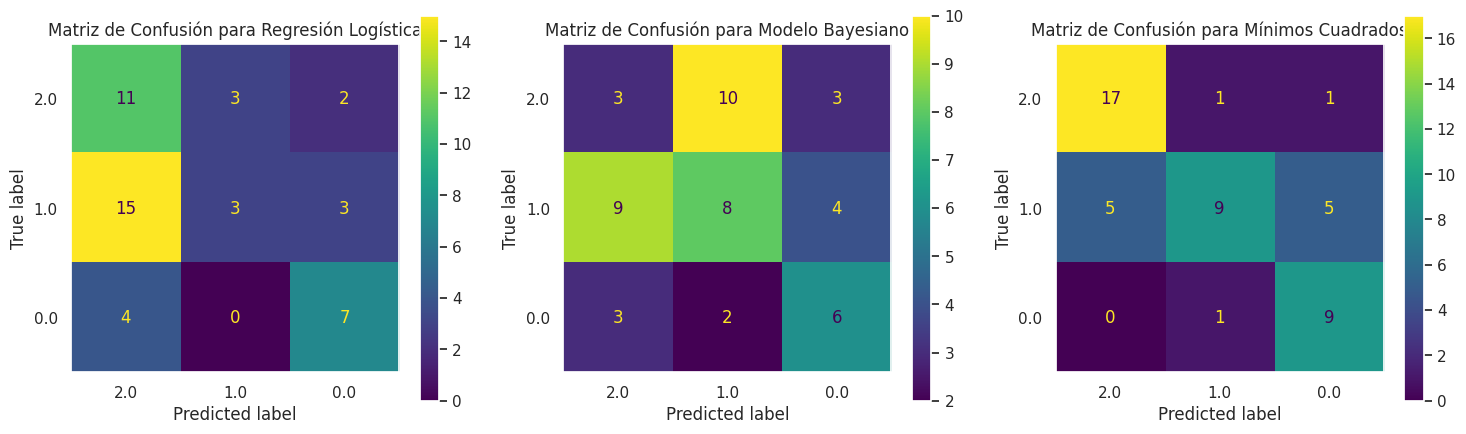

In [11]:
matriz_confusion_LR, matriz_confusion_NB, matriz_confusion_mi, precision_LR, precision_NB, precision_mi = evaluar_modelos(PcaComponents(X,n=2),Y)
graficas_confusion(matriz_confusion_LR, matriz_confusion_NB, matriz_confusion_mi)

#####5 componentes

transformed shape: (160, 5)
Precisión para regresión logística:  0.3333333333333333
Precisión para modelo bayesiano:  0.4166666666666667
Precisión para mínimos cuadrados:  0.7291666666666666


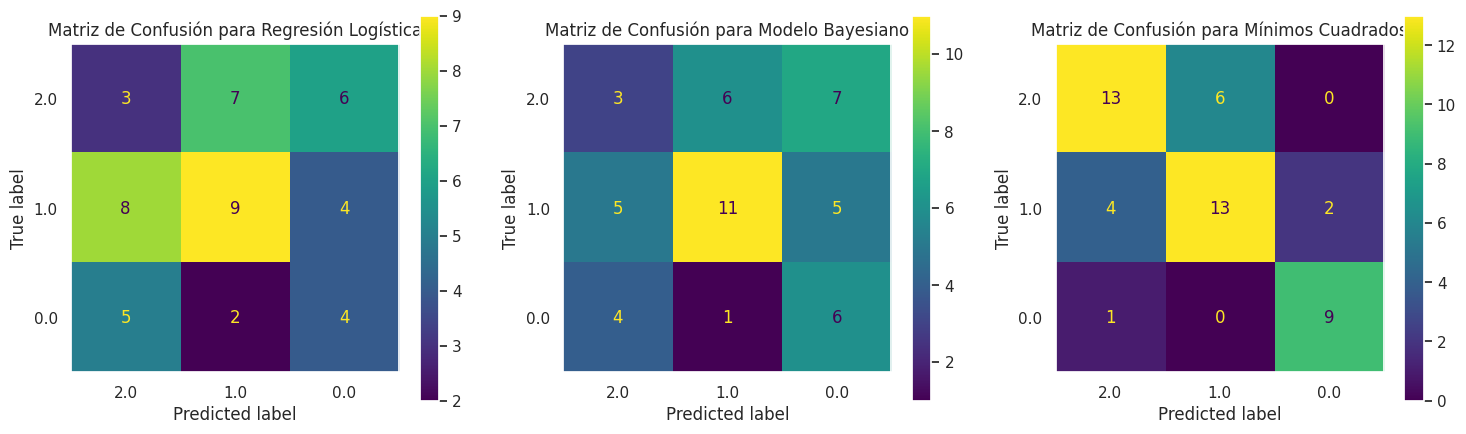

In [12]:
matriz_confusion_LR, matriz_confusion_NB, matriz_confusion_mi, precision_LR, precision_NB, precision_mi = evaluar_modelos(PcaComponents(X,n=5),Y)
graficas_confusion(matriz_confusion_LR, matriz_confusion_NB, matriz_confusion_mi)

#####10 componentes

transformed shape: (160, 10)
Precisión para regresión logística:  0.3125
Precisión para modelo bayesiano:  0.3958333333333333
Precisión para mínimos cuadrados:  0.7708333333333334


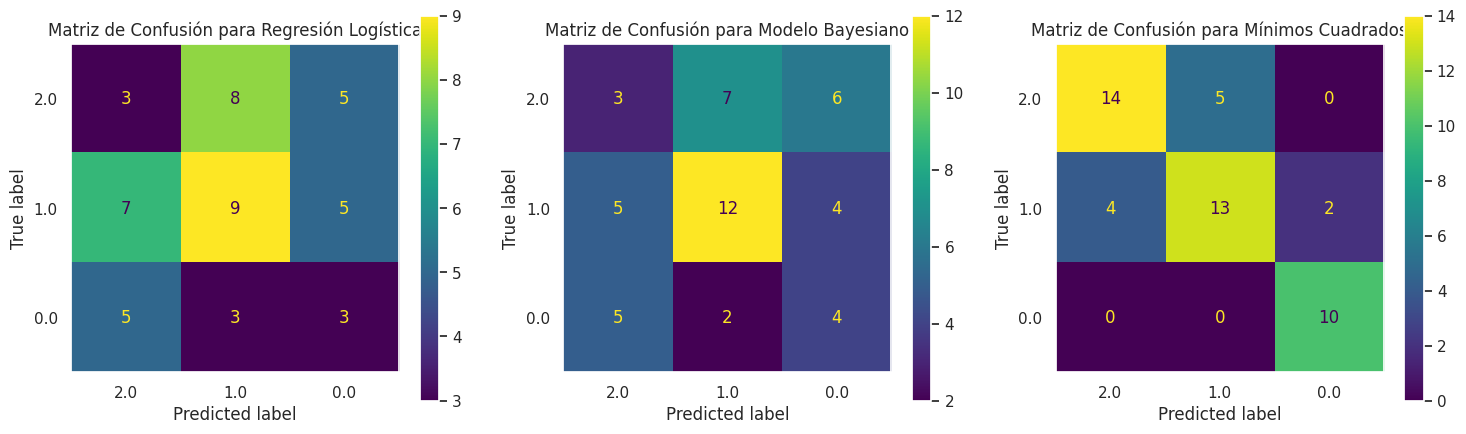

In [13]:
matriz_confusion_LR, matriz_confusion_NB, matriz_confusion_mi, precision_LR, precision_NB, precision_mi = evaluar_modelos(PcaComponents(X,n=10),Y)
graficas_confusion(matriz_confusion_LR, matriz_confusion_NB, matriz_confusion_mi)

#####20 componentes

transformed shape: (160, 20)
Precisión para regresión logística:  0.4791666666666667
Precisión para modelo bayesiano:  0.3333333333333333
Precisión para mínimos cuadrados:  0.7708333333333334


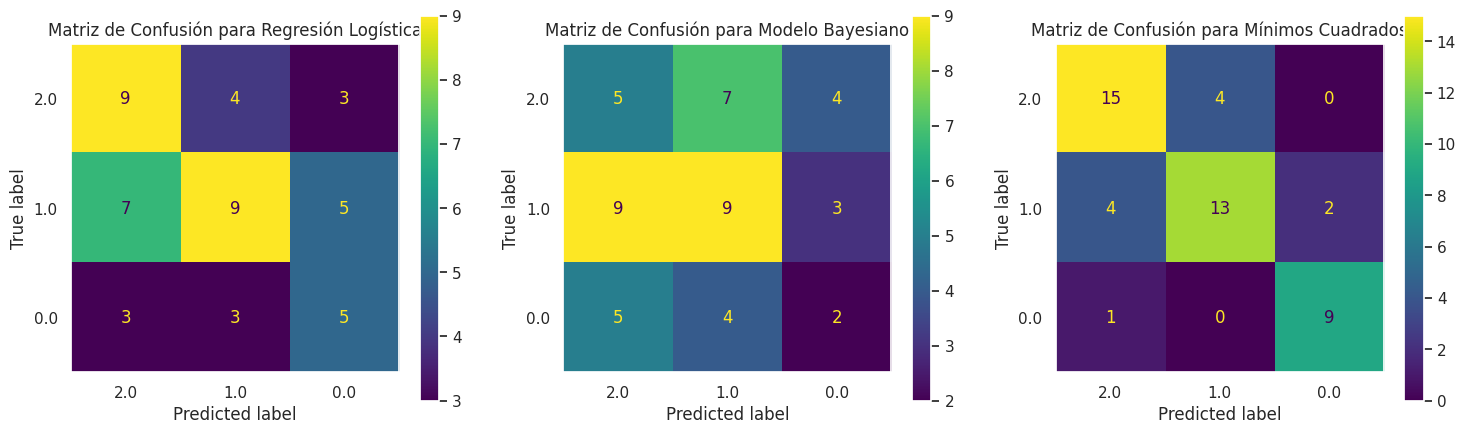

In [14]:
matriz_confusion_LR, matriz_confusion_NB, matriz_confusion_mi, precision_LR, precision_NB, precision_mi = evaluar_modelos(PcaComponents(X,n=20),Y)
graficas_confusion(matriz_confusion_LR, matriz_confusion_NB, matriz_confusion_mi)

#####30 componentes

transformed shape: (160, 30)
Precisión para regresión logística:  0.5416666666666666
Precisión para modelo bayesiano:  0.4166666666666667
Precisión para mínimos cuadrados:  0.75


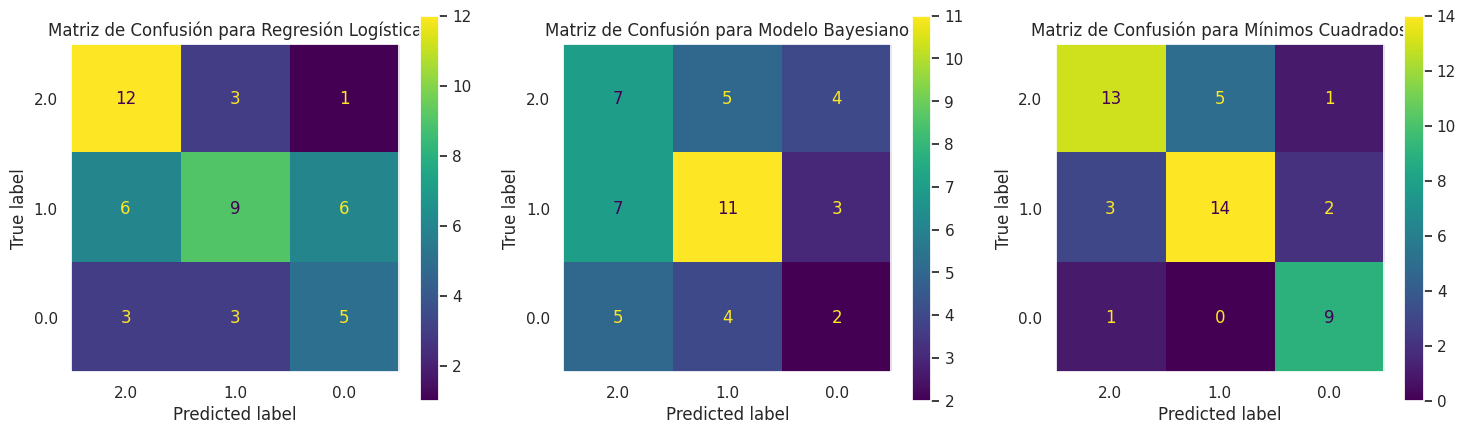

In [15]:
matriz_confusion_LR, matriz_confusion_NB, matriz_confusion_mi, precision_LR, precision_NB, precision_mi = evaluar_modelos(PcaComponents(X,n=30),Y)
graficas_confusion(matriz_confusion_LR, matriz_confusion_NB, matriz_confusion_mi)

#####50 componentes

transformed shape: (160, 50)
Precisión para regresión logística:  0.5
Precisión para modelo bayesiano:  0.22916666666666666
Precisión para mínimos cuadrados:  0.8333333333333334


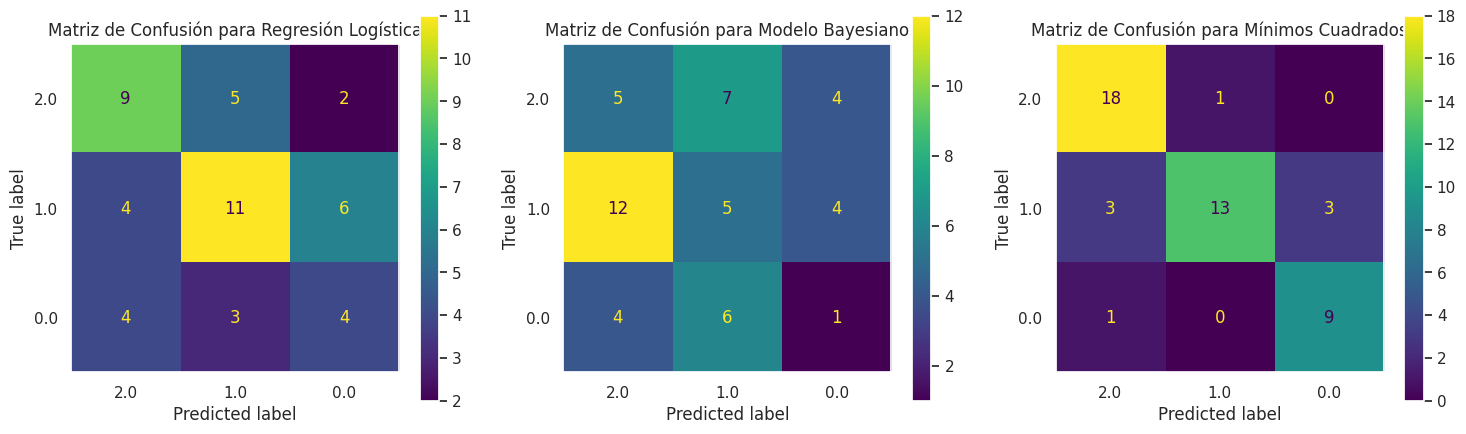

In [16]:
matriz_confusion_LR, matriz_confusion_NB, matriz_confusion_mi, precision_LR, precision_NB, precision_mi = evaluar_modelos(PcaComponents(X,n=50),Y)
graficas_confusion(matriz_confusion_LR, matriz_confusion_NB, matriz_confusion_mi)

####Analisis de resultados ítem 1
Se realizaron diversas evaluaciones y exploraciones del espacio latente utilizando PCA y se llevaron a cabo pruebas con modelos de clasificación Bayesiano, Regresión Logística y Mínimos Cuadrados, tanto con datos originales como con componentes PCA.

- Se evidenció que la mayoría de las proyecciones del espacio latente mostraban agrupamientos y traslapes en el centro de las sub-gráficas.
En la diagonal principal, la mayoría de las gaussianas estaban centradas en cero, con excepción de la componente 1 donde las gaussianas mostraban solapamientos parciales.
Zonas en las que los datos estaban agrupados en el centro pero no traslapados, permitían distinguir claramente cada tipo de sismo.

- Aunque la mayoría de los datos parecían agruparse en el centro en algunas sub-gráficas, se identificaron zonas donde los datos estaban muy agrupados pero no traslapados. La identificación de patrones en estas zonas favorece la distinción de tipos de sismos.

- Para los Minimos Cuadrados se destaca como el mejor en todas las configuraciones de PCA, ofreciendo un desempeño consistente. Ahora para la Regresion Logistica muestra relativa insensibilidad al número de componentes de PCA con un desempeño general inferior al modelo de Mínimos Cuadrados y el modelo Bayesiano experimenta variaciones significativas en precisión según el número de componentes de PCA, aunque mejora con PCA, sigue siendo superado por el modelo de Regresión Logística sin PCA.

- Se puede notar que los PCA contribuye significativamente a mejorar las predicciones finales, independientemente del modelo utilizado facilitando una representación más precisa y reducida de los datos.

- Para los resultados sin PCA los Mínimos Cuadrados destaca como el modelo superior, ofreciendo predicciones más precisas y una matriz de confusión coherente, la Regresión Logística supera al modelo Bayesiano tanto en precisión como en resultados de la matriz de confusión, ademas la matriz de confusión refleja resultados coherentes, en línea con las observaciones visuales de pairplots.

- Ambos modelos, con y sin PCA, muestran un ligero sobreajuste al presentar un desempeño inferior en datos de prueba. La elección del número de componentes en PCA debe realizarse cuidadosamente para evitar sobreajuste computacionales elevados.


## Ítem 2. Kernel PCA

In [17]:
@interact(kernel=['rbf', 'linear', 'poly', 'cosine'])

def apply_kernel_pca(kernel):
    # Configura el modelo Kernel PCA con el kernel seleccionado
    kpca = KernelPCA(kernel=kernel, gamma=10, n_components=2)
    projectedZ2 = kpca.fit_transform(X)

    # Colores para la visualización
    viridis_colors = [cm.viridis(x) for x in [2.0, 0.2, 0.5]]

    # Configura el modelo PCA estándar
    pca1 = PCA(n_components=2)
    projectedZ1 = pca1.fit_transform(X)

    # Configura el subplot con 1 fila y 2 columnas
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Visualización con Kernel PCA
    for label in range(3):
        axes[0].scatter(
            projectedZ2[np.squeeze(Y) == label, 0],
            projectedZ2[np.squeeze(Y) == label, 1],
            c=[viridis_colors[label]],
            edgecolor='none',
            alpha=0.8,
            label=f'Emoción {label}'
        )

    axes[0].legend()
    axes[0].set_title('Kernel PCA')
    axes[0].set_xlabel('Componente Principal 1')
    axes[0].set_ylabel('Componente Principal 2')

    # Visualización con PCA estándar
    for label in range(3):
        axes[1].scatter(
            projectedZ1[np.squeeze(Y) == label, 0],
            projectedZ1[np.squeeze(Y) == label, 1],
            c=[viridis_colors[label]],
            edgecolor='none',
            alpha=0.8,
            label=f'Emoción {label}'
        )
    axes[1].legend()
    axes[1].set_title('PCA')
    axes[1].set_xlabel('Componente Principal 1')
    axes[1].set_ylabel('Componente Principal 2')

    plt.show()


interactive(children=(Dropdown(description='kernel', options=('rbf', 'linear', 'poly', 'cosine'), value='rbf')…

####Analisis ítem 2.a

Para este escenario, se utilizaron diferentes funciones de kernel, incluyendo base radial, lineal, polinomial y coseno, con el fin de explorar su impacto en la representación de datos mediante técnicas de reducción de dimensionalidad.

- Para la función base radial se puede notar que la aplicación de esta función evidencia un cambio sustancial con respecto a PCA, ya que los datos tienden a agruparse de manera que sugiere la formación de una línea recta en el eje X=0. Este comportamiento distinto resalta la capacidad de la función base radial para modelar patrones no lineales en los datos.

- En la función lineal donde en comparación con PCA, la función lineal no muestra variación apreciable en la representación de los datos. Las dos visualizaciones gráficas son prácticamente idénticas, sugiriendo que, en este contexto específico, la función lineal no ofrece ventajas significativas sobre PCA.

- Para la función polinomial podemos observar en la gráfica de esta función donde revela una concentración limitada de puntos. Este fenómeno puede atribuirse a la capacidad de la función polinomial para incrementar la discriminación entre diversas clases, aunque en este caso particular, podría indicar una sensibilidad a la complejidad del modelo.

- Ahora la función coseno genera una dispersión uniforme de los datos en toda la gráfica. Al compararla con PCA, donde los datos están agrupados y podrían no visualizarse claramente, se aprecia que la función coseno ofrece una representación más esparcida y detallada de los datos

In [18]:
def kpca_reg(cont):
  kernels = ['rbf', 'linear', 'poly', 'cosine']
  unique_emotions = df_reducido['Emocion'].unique()

  # Configurar la disposición de los subgráficos
  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

  # Aplanar la matriz de subgráficos para facilitar la iteración
  axes = axes.flatten()
  accuracy_LR_Kernel = []

  for i, (ax, kernel) in enumerate(zip(axes.flatten(), kernels)):
      # Aplica KernelPCA con el kernel actual
      kpca = KernelPCA(kernel=kernel, gamma=10, n_components=cont)
      projected_data = kpca.fit_transform(X)

      # Se dividen los datos en conjuntos de entrenamiento y prueba
      X_train, X_test, y_train, y_test = train_test_split(projected_data, Y, test_size=0.3, random_state=0)
      y_train = y_train.ravel()
      y_test = y_test.ravel()

      # Regresión Logística
      clf = LogisticRegression(max_iter=1600).fit(X_train, y_train)
      y_pred_LR_test = clf.predict(X_test)

      # Calcula y muestra la precisión
      accuracy_LR = accuracy_score(y_test, y_pred_LR_test)
      print(f'Precisión para KPCA con kernel {kernel}: {accuracy_LR}')
      accuracy_LR_Kernel.append(accuracy_LR)

      # Matriz de confusión en el subgráfico correspondiente
      confusion_matrix_LR = confusion_matrix(y_test, y_pred_LR_test)
      matrix_display = ConfusionMatrixDisplay(confusion_matrix_LR, display_labels=unique_emotions)
      matrix_display.plot(ax=ax)
      ax.grid(False)
      ax.set_title(f'Matriz de confusión para KPCA con kernel {kernel}')

  plt.tight_layout()
  plt.show()

#####KPCA con 2 componentes

Precisión para KPCA con kernel rbf: 0.3541666666666667
Precisión para KPCA con kernel linear: 0.4375
Precisión para KPCA con kernel poly: 0.4166666666666667
Precisión para KPCA con kernel cosine: 0.3541666666666667


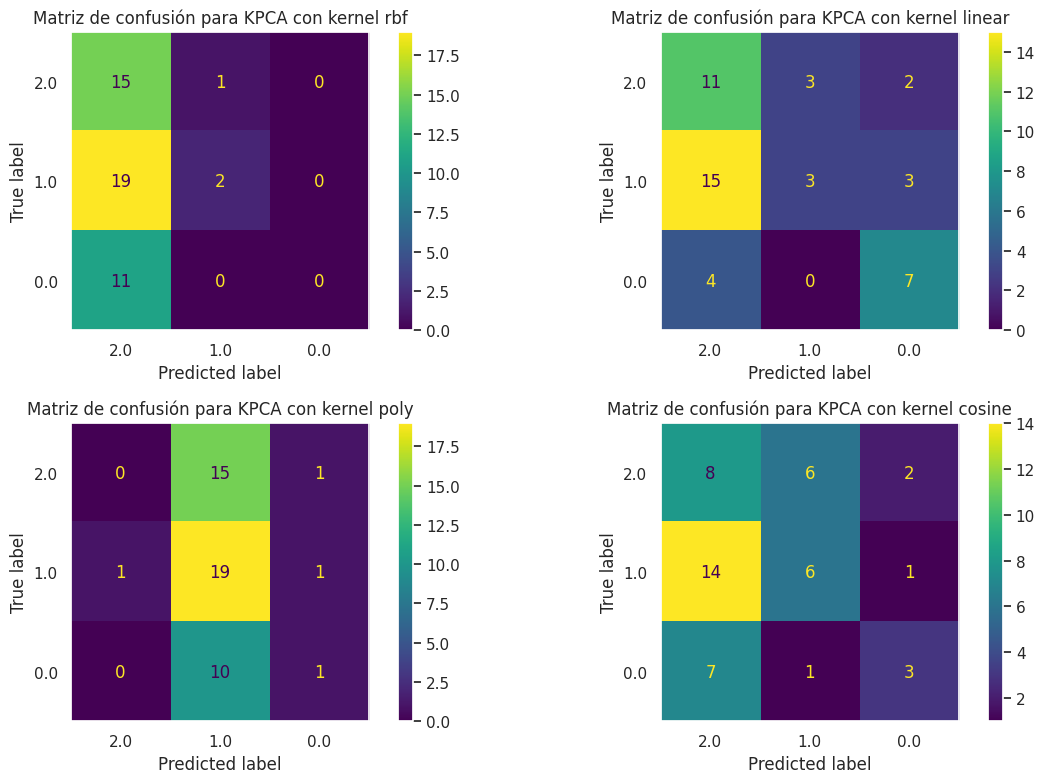

In [19]:
kpca_reg(2)

#####KPCA con 5 componentes

Precisión para KPCA con kernel rbf: 0.3541666666666667
Precisión para KPCA con kernel linear: 0.3333333333333333
Precisión para KPCA con kernel poly: 0.3125
Precisión para KPCA con kernel cosine: 0.375


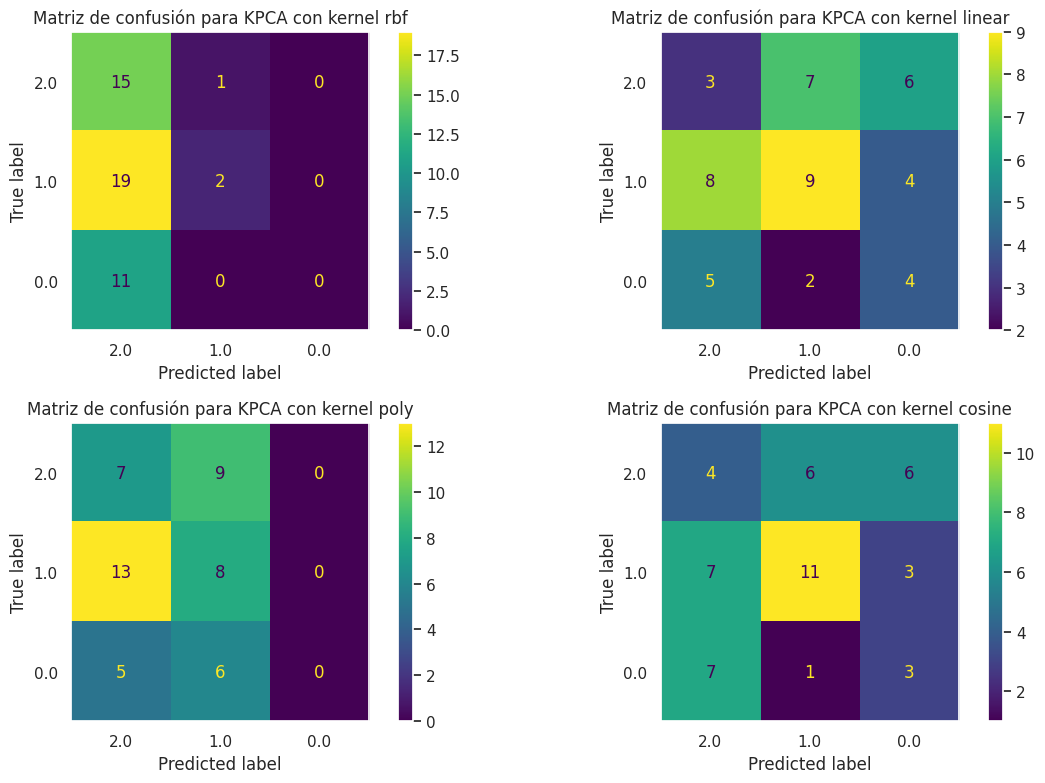

In [20]:
kpca_reg(5)

#####KPCA con 20 componentes

Precisión para KPCA con kernel rbf: 0.4166666666666667
Precisión para KPCA con kernel linear: 0.4791666666666667
Precisión para KPCA con kernel poly: 0.5208333333333334
Precisión para KPCA con kernel cosine: 0.5


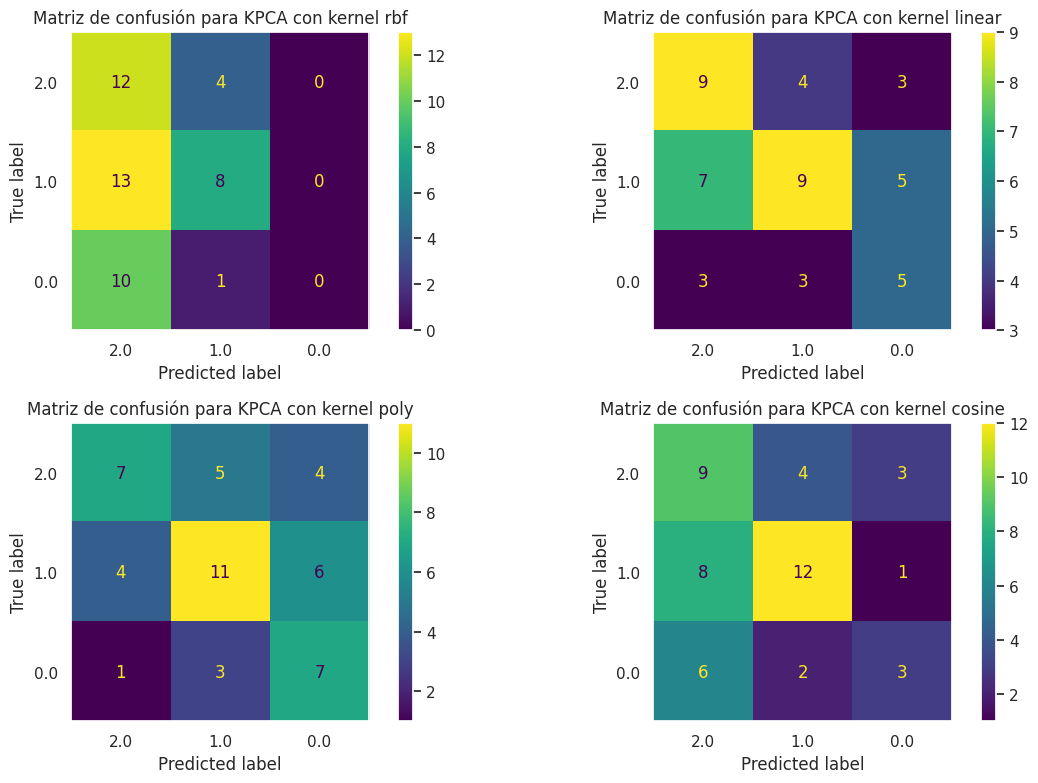

In [21]:
kpca_reg(20)

#####KPCA con 30 componentes

Precisión para KPCA con kernel rbf: 0.375
Precisión para KPCA con kernel linear: 0.5416666666666666
Precisión para KPCA con kernel poly: 0.5
Precisión para KPCA con kernel cosine: 0.5


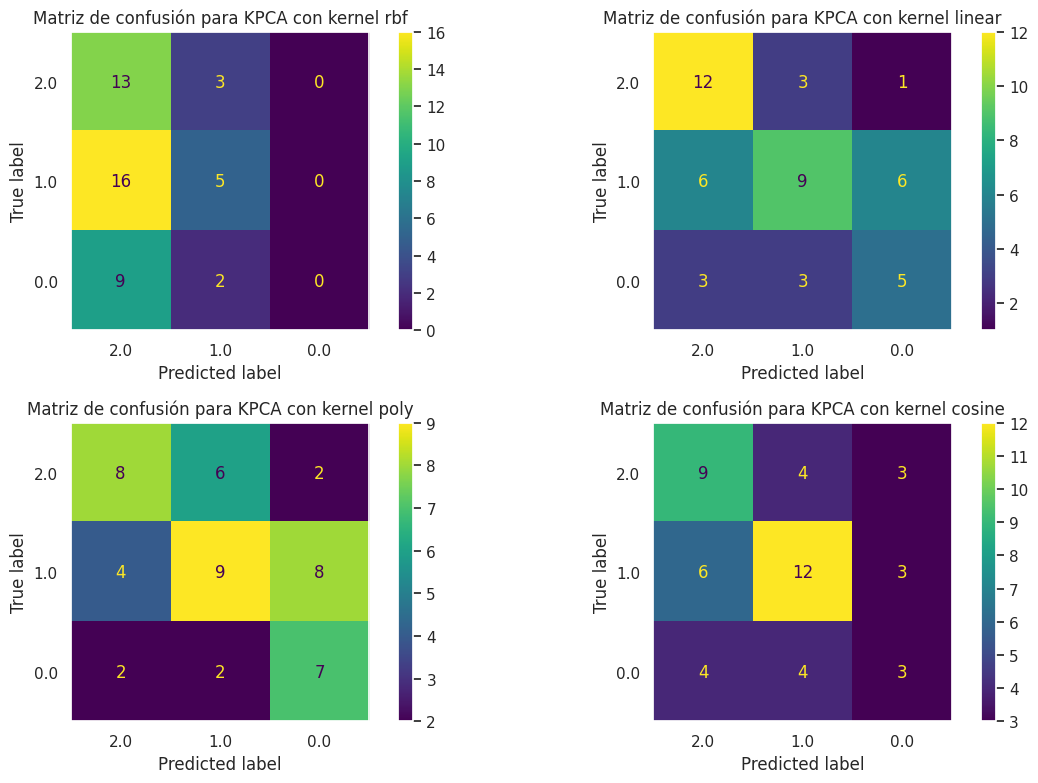

In [22]:
kpca_reg(30)

#####KPCA con 50 componentes

Precisión para KPCA con kernel rbf: 0.3541666666666667
Precisión para KPCA con kernel linear: 0.5
Precisión para KPCA con kernel poly: 0.3958333333333333
Precisión para KPCA con kernel cosine: 0.5


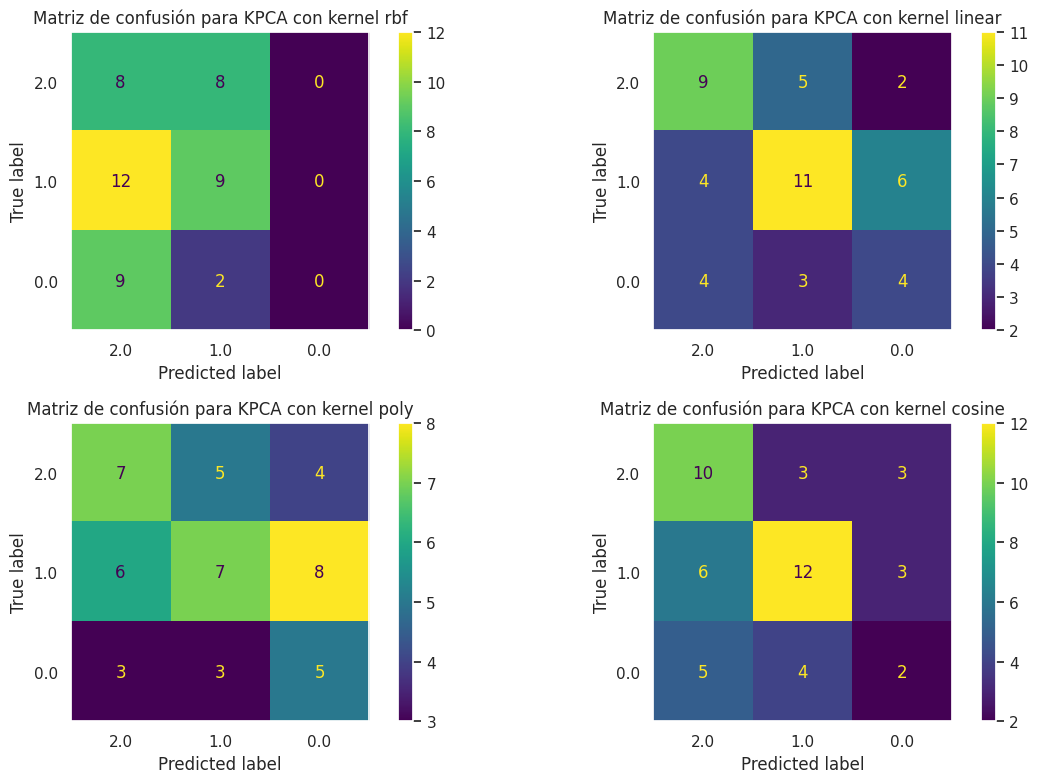

In [23]:
kpca_reg(50)

####Analisis ítem 2.b

- El código ajusta un modelo de Regresión Logística después de aplicar KernelPCA con diferentes kernels. Muestra la precisión del modelo en la predicción de emociones en el conjunto de prueba para cada kernel. La precisión del modelo se imprime para cada kernel asi podemos observar cómo la precisión varía con los diferentes kernels utilizados
- Además de la precisión, se visualizan las matrices de confusión para cada kernel. Estas matrices proporcionan información detallada sobre cómo se están clasificando las diferentes emociones y si hay alguna confusión entre ellas tambien podemos observar como la disposición de subgráficos permite una comparación visual rápida entre las matrices de confusión para cada kernel. Puedes identificar patrones de aciertos y errores en la clasificación de emociones.
- Se puede determinar que las precisiones son relativamente bajas, oscilando entre 0.354 y 0.4375 para un numero de componentes de 2, los kernel rbf y coseno tienen precisiones similares y relativamente bajas, indicando que la transformación del espacio con KernelPCA y dos componentes no mejora significativamente la capacidad del modelo para clasificar emociones, ahora para el kernel lineal la precisión con este kernel es un poco mejor que con RBF y Coseno, pero aún se encuentra en el rango bajo, sin embargo el kernel polinomial presenta una precisión moderada, pero aún en el rango inferior.

- Ahora en comparacion con los demas numeros de componentes, se puede determinar como el kernel lineal en general, es el kernel que muestra la mejor precisión en la mayoría de los casos, especialmente con un mayor número de componentes. Puede ser que la relación lineal en el espacio transformado sea más beneficioso para este conjunto de datos, como tambien el kernel polinomial muestra mejoras significativas en precisión con un mayor número de componentes, pero aún así no supera al kernel lineal en la mayoría de los casos.

##Conclusiones

- La regresión logística sin PCA mostró un desempeño sólido con una precisión del 87.7% en los datos de prueba, ademas se pudo observar como el modelo bayesiano no se adaptó de manera óptima, con una precisión del 35.4% en los datos de prueba.

- La aplicación de KernelPCA con diferentes kernels y números de componentes no condujo a mejoras consistentes en la precisión, sin embargo el kernel lineal mostró la mejor precisión en varios casos, pero la variabilidad en los resultados sugiere que el conjunto de datos podría no beneficiarse significativamente de la transformación no lineal de KernelPCA, ademas no hay una relación clara entre la precisión y el número de componentes en KernelPCA. Se observan fluctuaciones en diferentes experimentos.

- En general, la regresión logística sin PCA superó a los modelos basados en KernelPCA en términos de precisión. El rendimiento del modelo bayesiano mejoró con PCA, pero la regresión logística sin PCA aún fue superior.

- Las proyecciones del espacio latente mediante PCA y KernelPCA permitieron visualizar patrones de agrupación, aunque la interpretación de estos patrones puede depender del kernel utilizado, para tener una buena elección del modelo puede depender de la naturaleza de los datos y de la capacidad de los modelos para capturar la complejidad del conjunto de datos, tambien se puede determinaer que el kernel lineal pareció ser más efectivo en este proyecto, indicando que la relación lineal en el espacio transformado fue beneficiosa.

- Se observa una tendencia en los modelos a tener un rendimiento ligeramente inferior en los datos de prueba, sugiriendo la posibilidad de sobreajuste y la necesidad de técnicas adicionales para mejorar la generalización, ademas la elección del número de componentes en PCA y la selección del kernel en KernelPCA son consideraciones importantes, y la exploración de hiperparámetros puede influir en el rendimiento del modelo.

- Se puede sugerir que, en este caso particular, modelos más simples, como la regresión logística sin PCA, pueden ser más efectivos que enfoques más complejos como KernelPCA. La interpretación y elección de modelos deben ser consideradas cuidadosamente en función de la naturaleza específica del conjunto de datos y los objetivos del proyecto.